In [33]:
#Importing Pandas
import pandas as pd


In [34]:
# pull dataset from url
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows=1, header=None)

In [35]:
# adding the column headers
columns = 'age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income_bin'.split(', ')

In [36]:
df.columns = columns
df_test.columns = comun

NameError: name 'comun' is not defined

In [ ]:
# Getting to know the main dataframe
# Shape of DataFrame
print(df.shape)

In [ ]:
# Getting the data types of each column
df.info()
# income_bin is a string, let's transform it to something more suitable

In [25]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_bin
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
type(df)

pandas.core.frame.DataFrame

In [57]:
df['income_bin'].replace(' <=50K', 0, inplace=True)
df['income_bin'].replace(' >50K', 1, inplace=True)

In [105]:
for i in range(df.shape[1]):
    try:
        per = (df.iloc[:,1].value_counts()[' ?'] / df.shape[0]) * 100
        print('%s Column has %s percent of ?.'% (df.columns[i], per))
    except AttributeError:
        print('%s has no ?'%df.columns[i])

age Column has 5.638647461687294 percent of ?.
workclass Column has 5.638647461687294 percent of ?.
fnlwgt Column has 5.638647461687294 percent of ?.
education Column has 5.638647461687294 percent of ?.
education-num Column has 5.638647461687294 percent of ?.
marital-status Column has 5.638647461687294 percent of ?.
occupation Column has 5.638647461687294 percent of ?.
relationship Column has 5.638647461687294 percent of ?.
race Column has 5.638647461687294 percent of ?.
sex Column has 5.638647461687294 percent of ?.
capital-gain Column has 5.638647461687294 percent of ?.
capital-loss Column has 5.638647461687294 percent of ?.
hours-per-week Column has 5.638647461687294 percent of ?.
native-country Column has 5.638647461687294 percent of ?.
income_bin Column has 5.638647461687294 percent of ?.


24.08 percent of incomes are below 50K. 75.92 percent are above 50K.


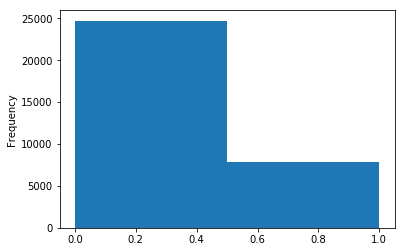

In [129]:
# Get a feeling for the income distribution
df['income_bin'].plot.hist(bins=2)
ab_bool = (df['income_bin'] == 0).value_counts('True')

print('%.2f percent of incomes are below 50K. %.2f percent are above 50K.' %(ab_bool[0]*100, ab_bool[1]*100))


/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


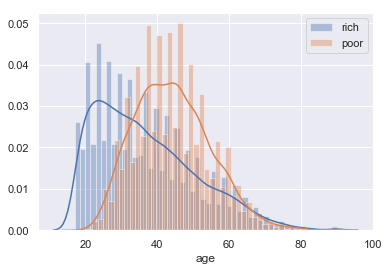

In [165]:
#import seaborn for better distro plots
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

age_rich = df['age'][df['income_bin'] == 0]
age_poor = df['age'][df['income_bin'] == 1]

sns.distplot(age_rich, label="rich")
sns.distplot(age_poor, label='poor')
plt.legend()


Plotting the age distribution grouped by income show, that there is a significant difference in their distribution. While the people with income below 50K show a normal distribution. The age distribution for people with income higher than 50K has a stron skewness towards younger age. 

In [162]:
income_groups = df.groupby('income_bin')
rich_group = income_groups.get_group(0)
poor_group = income_groups.get_group(1)

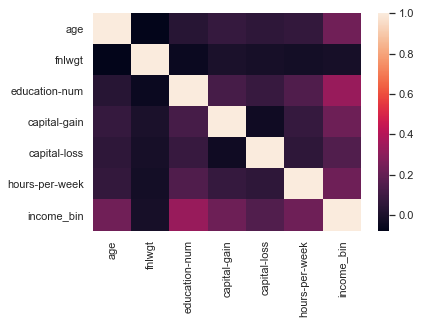

In [168]:
uniform_data = np.random.rand(10, 12)
corr = df.corr()
ax = sns.heatmap(corr)


Korrelation Matrix makes not so much sense for this dataset, since many features are cathegorical.